<a href="https://colab.research.google.com/github/priyarajmohan/ML_projects/blob/main/unsupervised_kmeans_PCA_Elbowmethod_pakistan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
from sklearn.cluster import KMeans

In [ ]:
import pandas as pd

In [ ]:
paki = pd.read_csv('/content/Pakistan_COVID19.csv')

In [ ]:
paki

,Province,New_Cases,Recoveries,Deaths,Vaccinations,Hospitalized,Tests_Conducted
0,Punjab,138,104,6,14226,83,7342
1,Sindh,206,188,2,15104,86,2470
2,KPK,277,234,6,16362,28,26118
3,Balochistan,371,368,4,19607,60,28117
4,Islamabad,243,225,6,9466,89,18861
...,...,...,...,...,...,...,...
495,Punjab,477,458,2,4026,16,14958
496,Sindh,131,81,6,5042,91,11550
497,KPK,465,415,7,2687,56,10936
498,Balochistan,100,84,8,5504,14,11490


In [ ]:
paki.isnull().sum()

,0
Province,0
New_Cases,0
Recoveries,0
Deaths,0
Vaccinations,0
Hospitalized,0
Tests_Conducted,0


In [ ]:
paki.duplicated().sum()

np.int64(0)

In [ ]:
paki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Province         500 non-null    object
 1   New_Cases        500 non-null    int64 
 2   Recoveries       500 non-null    int64 
 3   Deaths           500 non-null    int64 
 4   Vaccinations     500 non-null    int64 
 5   Hospitalized     500 non-null    int64 
 6   Tests_Conducted  500 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 27.5+ KB


In [ ]:
paki.head()

,Province,New_Cases,Recoveries,Deaths,Vaccinations,Hospitalized,Tests_Conducted
0,Punjab,138,104,6,14226,83,7342
1,Sindh,206,188,2,15104,86,2470
2,KPK,277,234,6,16362,28,26118
3,Balochistan,371,368,4,19607,60,28117
4,Islamabad,243,225,6,9466,89,18861


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for i in paki.select_dtypes(include=['object']).columns:
  paki[i] = le.fit_transform(paki[i])

In [ ]:
paki

,Province,New_Cases,Recoveries,Deaths,Vaccinations,Hospitalized,Tests_Conducted
0,3,138,104,6,14226,83,7342
1,4,206,188,2,15104,86,2470
2,2,277,234,6,16362,28,26118
3,0,371,368,4,19607,60,28117
4,1,243,225,6,9466,89,18861
...,...,...,...,...,...,...,...
495,3,477,458,2,4026,16,14958
496,4,131,81,6,5042,91,11550
497,2,465,415,7,2687,56,10936
498,0,100,84,8,5504,14,11490


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
for i in paki.columns:
  sc.fit_transform(paki[[i]])

In [ ]:
paki

,Province,New_Cases,Recoveries,Deaths,Vaccinations,Hospitalized,Tests_Conducted
0,3,138,104,6,14226,83,7342
1,4,206,188,2,15104,86,2470
2,2,277,234,6,16362,28,26118
3,0,371,368,4,19607,60,28117
4,1,243,225,6,9466,89,18861
...,...,...,...,...,...,...,...
495,3,477,458,2,4026,16,14958
496,4,131,81,6,5042,91,11550
497,2,465,415,7,2687,56,10936
498,0,100,84,8,5504,14,11490


In [ ]:
wcss = []

In [ ]:
for i in range(1,11):

   K_means = KMeans(n_clusters=i,init='k-means++',random_state=42)
   K_means.fit(paki)
   wcss.append(K_means.inertia_)

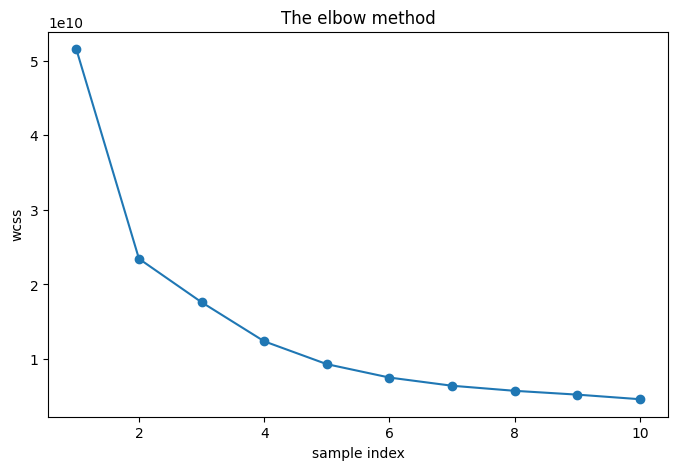

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11),wcss,marker = 'o')
plt.title('The elbow method')
plt.xlabel('sample index')
plt.ylabel('wcss')
plt.show()

In [ ]:
model = KMeans(n_clusters=2,init='k-means++',random_state=42)
y_kmeans = model.fit_predict(paki)
paki['clusters'] = y_kmeans

In [ ]:
paki

,Province,New_Cases,Recoveries,Deaths,Vaccinations,Hospitalized,Tests_Conducted,clusters
0,3,138,104,6,14226,83,7342,1
1,4,206,188,2,15104,86,2470,1
2,2,277,234,6,16362,28,26118,0
3,0,371,368,4,19607,60,28117,0
4,1,243,225,6,9466,89,18861,0
...,...,...,...,...,...,...,...,...
495,3,477,458,2,4026,16,14958,1
496,4,131,81,6,5042,91,11550,1
497,2,465,415,7,2687,56,10936,1
498,0,100,84,8,5504,14,11490,1


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(paki)
x_pca

array([[ -7492.68566413,   4608.39834874],
       [-12264.16451406,   5927.49389399],
       [ 11400.04467467,   5022.7554329 ],
       [ 13686.91031957,   8072.17062513],
       [  3544.09792789,  -1182.39454437],
       [ -7705.49031776,   2844.52891494],
       [  3359.7663858 ,   6384.94728585],
       [  8460.5188229 ,  -8417.11191658],
       [ 13179.19851829,  -9547.03962002],
       [  5189.42591868,   -335.35905379],
       [ 12420.12007585,   5808.43900386],
       [  7151.81765051,   6539.16625509],
       [ 11547.52340543,    429.86707861],
       [ -6017.35112604,   8751.60092861],
       [-10896.39053942,  -1153.39414446],
       [  -810.20281569,   3989.40007215],
       [   875.29947476,   3314.09584397],
       [ 14228.59663038,   4963.12208176],
       [-13791.85739859,   6778.53131111],
       [-12284.61599987,  -6724.42433699],
       [  3025.49845525,  -8900.96258599],
       [-11949.86335903,  -2675.35700621],
       [ -3072.58879775,  -1578.24706881],
       [-12

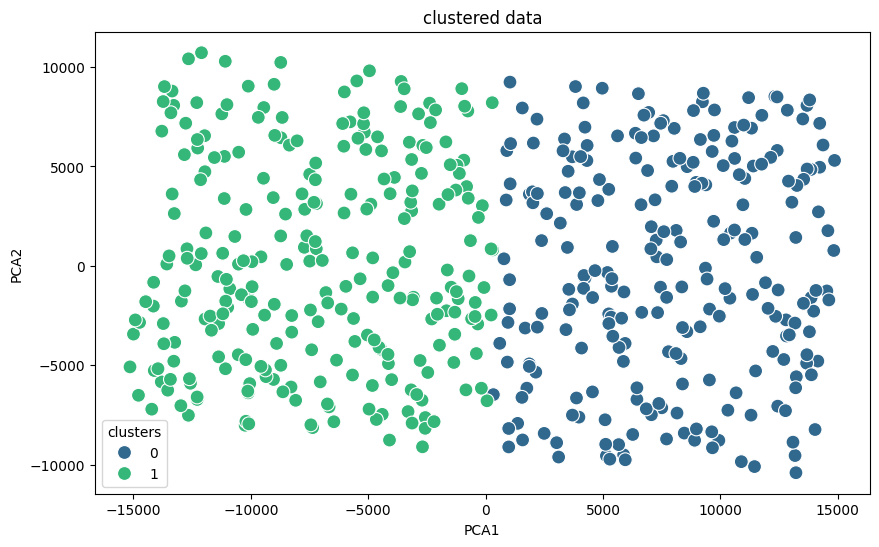

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_pca[:,0],y=x_pca[:,1],hue=paki['clusters'],palette ='viridis',s=100)
plt.title('clustered data')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()